<a href="https://colab.research.google.com/github/chelseiji/Data2000HW/blob/main/NeuralNetworks_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks

This homework is due on or before Tuesday 30 October, 11:59pm Eastern time. Publish your code to GitHub and provide a link to it in your Canvas submission.

For this problem set, we will use the CDC Diabetes Health Indicators dataset from the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators). You can load it into your development environment as a Pandas dataframe with:

```bash
pip install ucimlrepo
```

```python
import pandas as pd
from ucimlrepo import fetch_ucirepo

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
X = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets

# metadata
print(cdc_diabetes_health_indicators.metadata)

# variable information
print(cdc_diabetes_health_indicators.variables)
```

This dataset was created by the Centers for Disease Control and Prevention to better understand the relationship between lifestyle and diabetes in the US. Each row represents a person participating in this study.

## Part 1: Feature Selection

Our dataset contains a participant ID column, `Diabetes_binary` (which is the column we will use as our label), and 21 additional columns that can all serve as possible inputs to our model. A complete data dictionary is available at the [UCI dataset page](https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators).

**Create a dataframe with `Diabetes_binary` and as many additional columns from our original dataset as you feel are necessary as features for a predictive model. Explain your choices.**

## Part 2: Data Cleaning

Based on the dataset that you created for Part 1, **normalize any numeric features, dummy- or one-hot encode any categorical features, and remove any outliers or spurious records. Explain your choices.**

You can use Tensorflow's [`CategoryEncoding` preprocessing layer](https://www.tensorflow.org/api_docs/python/tf/keras/layers/CategoryEncoding) for any boolean ot categorical columns. For more on using preprocessing layers, check out this [Tensorflow tutorial](https://www.tensorflow.org/tutorials/structured_data/preprocessing_layers#apply_the_keras_preprocessing_layers).

## Part 3: Feature Engineering

Based on the dataset that you created for Part 2, **create one or more engineered feature columns and explain why you chose to create these, or explain why you don't feel any are needed.**

## Part 4: Binary classification

Based on the dataset that you created for Part 3:

  - Split your dataset into training and testing samples at an 80:20 ratio;
  - Train a feed-forward neural network to predict whether an individual either has diabetes, or is at risk of developing diabetes.
    - This should include at least 2 hidden layers
    - The output layer should be a single neuron with a sigmoid activation function
    - The model should use a [binary crossentropy loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
    - You can use the Adam optimizer, or another if you prefer
    - You [model's metrics](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) should include accuracy and F1 score

**What is your model's accuracy on both the training and testing datasets?**

  - How does the accuracy compare against the F1 score?
  - Looking at a confusion matrix of your model's predictions (i.e., the true and false positive and negative predictions), would you consider your model to be a good classifier or not? Why?

In [1]:
pip install ucimlrepo

In [29]:

import pandas as pd
from ucimlrepo import fetch_ucirepo
from matplotlib import pyplot as plt

# fetch dataset
cdc_diabetes_health_indicators = fetch_ucirepo(id=891)

# data (as pandas dataframes)
x = cdc_diabetes_health_indicators.data.features
y = cdc_diabetes_health_indicators.data.targets


In [3]:
x.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [4]:
new_data=x.loc[:,["Age", "BMI", "PhysHlth", "DiffWalk", "HighBP", "HighChol", "PhysActivity","MentHlth"]]
new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighBP,HighChol,PhysActivity,MentHlth
0,9,40,15,1,1,1,0,18
1,7,25,0,0,0,0,1,0
2,9,28,30,1,1,1,0,30
3,11,27,0,0,1,0,1,0
4,11,24,0,0,1,1,1,3


I chose these columns from the original data set since they seemed to give the most important information that one could need to have when understanding the relation between lifestyle and ones health.

In [5]:
new_data["Unhealty_old"] = (
    (new_data["Age"]>35) &
     (new_data["PhysHlth"]>7)
).astype(int)
new_data["Overall_health"] = (new_data["PhysHlth"]+ new_data["MentHlth"]) /2
new_data.head()

,Age,BMI,PhysHlth,DiffWalk,HighBP,HighChol,PhysActivity,MentHlth,Unhealty_old,Overall_health
0,9,40,15,1,1,1,0,18,0,16.5
1,7,25,0,0,0,0,1,0,0,0.0
2,9,28,30,1,1,1,0,30,0,30.0
3,11,27,0,0,1,0,1,0,0,0.0
4,11,24,0,0,1,1,1,3,0,1.5


Here we create a column to find which of these people in the data set are considrered to be unhealth and old, this could be an important demographic when analyzing the data

Here we create a column which gives us the overall health which consisits of ones physical and mental health. These factors often contribute to ones overall health.

In [6]:
avg_age = new_data["Age"].mean()

In [7]:
st_dev = new_data["Age"].std()

In [8]:
new_data["Age"] = (new_data["Age"] - avg_age) / st_dev

In [9]:
new_data.describe()

,Age,BMI,PhysHlth,DiffWalk,HighBP,HighChol,PhysActivity,MentHlth,Unhealty_old,Overall_health
count,2.536800e+05,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.0,253680.000000
mean,9.500792e-17,28.382364,4.242081,0.168224,0.429001,0.424121,0.756544,3.184772,0.0,3.713426
std,1.000000e+00,6.608694,8.717951,0.374066,0.494934,0.494210,0.429169,7.412847,0.0,6.645639
min,-2.302427e+00,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-6.653479e-01,24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,-1.051634e-02,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.500000
75%,6.443152e-01,31.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.0,3.500000
max,1.626563e+00,98.000000,30.000000,1.000000,1.000000,1.000000,1.000000,30.000000,0.0,30.000000


Here we normalized the numerical feature

Binary Classifier

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(new_data, y, test_size=0.2)
x_train.describe()

,Age,BMI,PhysHlth,DiffWalk,HighBP,HighChol,PhysActivity,MentHlth,Unhealty_old,Overall_health
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.0,202944.000000
mean,0.000383,28.387994,4.235957,0.168687,0.429340,0.423974,0.756578,3.188643,0.0,3.712300
std,0.999638,6.607083,8.712355,0.374476,0.494983,0.494187,0.429149,7.410153,0.0,6.637457
min,-2.302427,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,-0.665348,24.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000
50%,-0.010516,27.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.500000
75%,0.644315,31.000000,3.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.0,3.500000
max,1.626563,98.000000,30.000000,1.000000,1.000000,1.000000,1.000000,30.000000,0.0,30.000000


In [11]:
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  df = dataframe.copy()
  df = {key: value[:,tf.newaxis] for key, value in dataframe.items()}
  ds = tf.data.Dataset.from_tensor_slices((dict(df), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(batch_size)
  return ds

In [12]:
import tensorflow as tf

In [13]:
inputs = {
    'Age':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Age'),
    'BMI':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='BMI'),
    'Overall_health':
        tf.keras.layers.Input(
            shape=(1,),
            dtype=tf.float32,
            name='Overall_health'),

}

In [14]:
# Concatenate our inputs into a single tensor.
preprocessing_layers = tf.keras.layers.Concatenate()(
    [inputs.get('Age'), inputs.get('BMI'), inputs.get('Overall_health')])

hidden1 = tf.keras.layers.Dense(
    units=32,
    name='hidden1')(preprocessing_layers)

hidden2 = tf.keras.layers.Dense(
    units=8,
    name='hidden2')(preprocessing_layers)


dense_output = tf.keras.layers.Dense(
    units=1,
    name='dense_output')(preprocessing_layers)

# Define an output dictionary we'll send to the model constructor.
outputs = {
'dense_output': dense_output
}

In [17]:
dnn_model = tf.keras.Model(inputs=inputs, outputs=outputs)
dnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    #Binary crossentrophy
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    #Precision, Recall, F1
    metrics=[tf.keras.metrics.F1Score()]
)

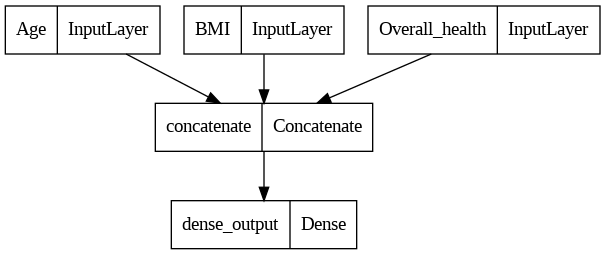

In [18]:
tf.keras.utils.plot_model(dnn_model)

In [22]:
import numpy as np

In [31]:
tf.config.run_functions_eagerly(True)

history = dnn_model.fit(
    {name:np.array(value) for name, value in x_train.items()},
    np.array(y_train.values),
    epochs=15,
    batch_size=1000,
    shuffle=True,
    validation_split=0.2
)

epochs = history.epoch
hist = pd.DataFrame(history.history)
mse = hist[tf.keras.losses.BinaryCrossentropy(from_logits=True)]

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['PhysHlth', 'DiffWalk', 'HighBP', 'HighChol', 'PhysActivity', 'MentHlth', 'Unhealty_old'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


ValueError: ignored

NameError: ignored

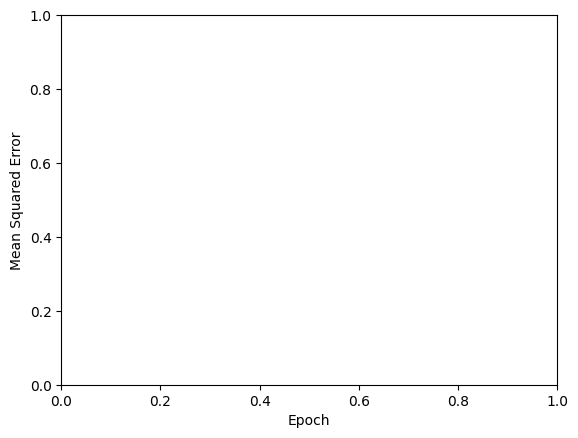

In [32]:
plt.figure()
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")

plt.plot(epochs, mse, label="Training Loss")
plt.plot(epochs, history.history["val_mean_squared_error"], label="Validation Loss")

# mse_training is a pandas Series, so convert it to a list first.
merged_mse_lists = mse.tolist() + history.history["val_mean_squared_error"]
highest_loss = max(merged_mse_lists)
lowest_loss = min(merged_mse_lists)
top_of_y_axis = highest_loss * 1.03
bottom_of_y_axis = lowest_loss * 0.97

plt.ylim([bottom_of_y_axis, top_of_y_axis])
plt.legend()
plt.show()

In [35]:
print("\n Evaluate the new model against the test set:")
dnn_model.evaluate(
    x={name:np.array(value) for name, value in x_test.items()},
    y=np.array(y_test.values),
    batch_size=1000,
    return_dict=True)


 Evaluate the new model against the test set:


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['PhysHlth', 'DiffWalk', 'HighBP', 'HighChol', 'PhysActivity', 'MentHlth', 'Unhealty_old'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


ValueError: ignored

In [36]:
print("\n Evaluate the new model against the test set:")
dnn_model.evaluate(
    x={name:np.array(value) for name, value in x_train.items()},
    y=np.array(y_train.values),
    batch_size=1000,
    return_dict=True)


 Evaluate the new model against the test set:


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['PhysHlth', 'DiffWalk', 'HighBP', 'HighChol', 'PhysActivity', 'MentHlth', 'Unhealty_old'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)


ValueError: ignored

I a was not able to completely find out if the model would be a good classifier based on the training and testing datasets, but my hypothesis would be that the model is a good classifier.